Probabilidades reales de cada palanca: [0.36696879 0.12017512 0.91111038 0.53711548]
La palanca óptima es la nº 2, con prob: 0.911
Recompensa total obtenida: 1734
Veces que elegimos la palanca óptima: 1831 de 2000 pasos
Estimaciones finales de cada palanca: [0.41666667 0.16981132 0.91370836 0.5       ]


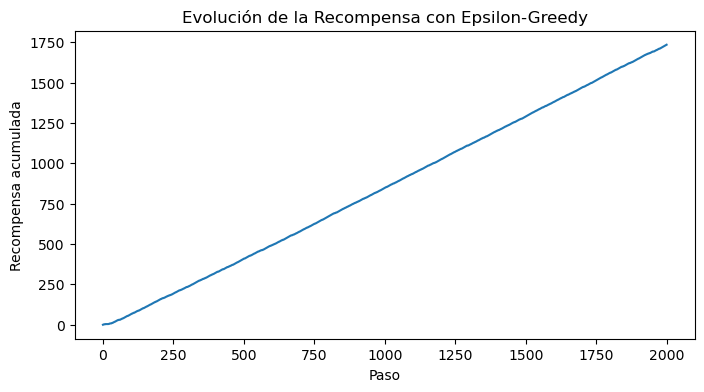

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_bandits(k=3):
    """
    Genera k probabilidades de recompensa para cada 'bandit' (palanca).
    Cada valor en [0, 1] indica la probabilidad de éxito (recompensa=1).
    """
    return np.random.rand(k)

def epsilon_greedy(bandits, n_steps=2000, epsilon=0.1):
    """
    Ejecuta la estrategia epsilon-greedy en un problema multi-armed bandit.
    
    Parámetros:
    - bandits: array con las probabilidades de recompensa de cada palanca.
    - n_steps: número de pasos / jugadas a realizar.
    - epsilon: probabilidad de explorar (elegir palanca aleatoria).

    Retorna:
    - rewards_history: lista con la recompensa obtenida en cada paso.
    - best_arm_counts: número de veces que escogimos la palanca 'óptima' real.
    - Q: estimaciones finales de la probabilidad de cada palanca.
    """
    k = len(bandits)           # Número de palancas
    Q = np.zeros(k)            # Estimación de recompensa para cada palanca
    counts = np.zeros(k)       # Cuántas veces hemos elegido cada palanca
    
    rewards_history = []
    best_arm_counts = 0
    
    # (Opcional) descubrimos cuál es la palanca "verdaderamente" mejor 
    # para medir cuántas veces la elegimos:
    true_best_arm = np.argmax(bandits)
    
    for step in range(n_steps):
        # Decidir si explorar o explotar
        if np.random.rand() < epsilon:
            arm = np.random.randint(k)  # Explorar: palanca aleatoria
        else:
            arm = np.argmax(Q)          # Explotar: palanca con mejor estimación
            
        # Obtener recompensa según la probabilidad real del bandit
        reward = 1 if np.random.rand() < bandits[arm] else 0
        
        # Actualizar contadores y estimaciones
        counts[arm] += 1
        Q[arm] = Q[arm] + (1.0 / counts[arm]) * (reward - Q[arm])
        
        # Guardar información
        rewards_history.append(reward)
        if arm == true_best_arm:
            best_arm_counts += 1
            
    return rewards_history, best_arm_counts, Q

# Ejemplo con k=4 bandits
k = 4
bandits_probs = generate_bandits(k=k)
print("Probabilidades reales de cada palanca:", bandits_probs)
true_best = np.argmax(bandits_probs)
print(f"La palanca óptima es la nº {true_best}, con prob: {bandits_probs[true_best]:.3f}")

# Jugamos 2000 pasos con epsilon=0.1
n_steps = 2000
epsilon = 0.1
rewards, best_arm_count, Q_est = epsilon_greedy(bandits_probs, n_steps, epsilon)

print(f"Recompensa total obtenida: {np.sum(rewards)}")
print(f"Veces que elegimos la palanca óptima: {best_arm_count} de {n_steps} pasos")
print("Estimaciones finales de cada palanca:", Q_est)

# Visualizar la recompensa acumulada a lo largo de los pasos
cumulative_rewards = np.cumsum(rewards)
plt.figure(figsize=(8,4))
plt.plot(cumulative_rewards)
plt.xlabel("Paso")
plt.ylabel("Recompensa acumulada")
plt.title("Evolución de la Recompensa con Epsilon-Greedy")
plt.show()
